In [1]:
import spacy
from spacy import displacy

from preprocessing import (
    WordCaser,
    PolishLemmatizer,
    PolishLetterReplacer,
    PunctuationRemover,
    StopWordsRemover,
    CurrencyRemover,
    UnitsRemover,
    NumberReplacer,
    WhitespaceRemover
)

nlp = spacy.load('pl_core_news_lg')

In [35]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

import pyLDAvis.sklearn

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset=pd.read_csv('polish_dataset.csv')
dataset.head()

,description,length,rate
0,Polecam nie pierwszy i nie ostatni raz!,39.0,1.0
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121.0,1.0
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87.0,1.0
3,0,0.0,0.0
4,Jestem w pełni zadowolona z przebiegu transakcji,48.0,1.0


In [11]:
del dataset['length']
del dataset['rate']
dataset = dataset[dataset.description != 0]
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936254 entries, 0 to 936882
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  936254 non-null  object
dtypes: object(1)
memory usage: 14.3+ MB


In [19]:
a=dataset['description'].head(10)

additional_punctuation = ['\\.', '\\+', '/', '%']


preprocessing_pipe = make_pipeline(
    WordCaser(),
    PolishLemmatizer(),
    PolishLetterReplacer(),
    PunctuationRemover(additional_punctuation=additional_punctuation),
    StopWordsRemover(),
    CurrencyRemover(),
    UnitsRemover(),
    NumberReplacer(),
    WhitespaceRemover()
)

a = preprocessing_pipe.fit_transform(a.values)


In [20]:
a

['polecac pierwszy ostatni',
 'dobry komunikacja sms telefoniczny zamowiony towar wyslany termin zabezpieczony polecac sklep',
 'polecac zakup sklep dostepny czesc stary model np lodowka',
 '#NUMBER',
 'pelnia zadowolony przebieg transakcja',
 'transakcja przebiec blyskawicznie pelny profesjonalizm polecac sklep',
 'obsluga godny polecenie klient tranzakcja przebiec szybko bezproblemowo',
 'obsluga czas realizacja poziom zapakowania paczka wzorcowo polecac',
 'sprawnie bezproblemowo',
 'transakcja przebiegac b sprawnie produkt przesylka b szybko polecac']

In [26]:
additional_punctuation = ['\\.', '\\+', '/', '%']


preprocessing_pipe = make_pipeline(
    WordCaser(),
    PolishLemmatizer(),
    PolishLetterReplacer(),
    PunctuationRemover(additional_punctuation=additional_punctuation),
    StopWordsRemover(),
    CurrencyRemover(),
    UnitsRemover(),
    NumberReplacer(),
    WhitespaceRemover()
)

description_transformed = preprocessing_pipe.fit_transform(dataset['description'].values)

In [27]:
description_transformed

['polecac pierwszy ostatni',
 'dobry komunikacja sms telefoniczny zamowiony towar wyslany termin zabezpieczony polecac sklep',
 'polecac zakup sklep dostepny czesc stary model np lodowka',
 '#NUMBER',
 'pelnia zadowolony przebieg transakcja',
 'transakcja przebiec blyskawicznie pelny profesjonalizm polecac sklep',
 'obsluga godny polecenie klient tranzakcja przebiec szybko bezproblemowo',
 'obsluga czas realizacja poziom zapakowania paczka wzorcowo polecac',
 'sprawnie bezproblemowo',
 'transakcja przebiegac b sprawnie produkt przesylka b szybko polecac',
 'pierwszy odebrac przesylka paczkomat wrocic sprzedawca sklep wyslac ponownie przesylka dodatkowy oplata p l e c',
 'dobry kontakt sklep szybki wysylka nastepny dzien wplata miec produkt zamawiac szyba piekarnik dokladnie zabezpieczona polecac',
 'sprawnie milo polecac zdarzyc blad reklamacja zalatwiac reka problem',
 'transakcja przebiec pomyslnie',
 'rzetelny konkretny elastyczny obsluga wyrozumiec decyzja kupujacego polecac potrze

In [28]:
#number_action = 'delete'

tfidf_max_df = 1.0
tfidf_min_df = 10

In [29]:
count_vectorizer = CountVectorizer(
        max_df=tfidf_max_df,
        min_df=tfidf_min_df,
        ngram_range=ngram_range)

In [30]:
X_count_vectorized = count_vectorizer.fit_transform(description_transformed)

In [31]:
X_count_vectorized

<936254x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 4312970 stored elements in Compressed Sparse Row format>

In [32]:
lda = LatentDirichletAllocation(
        n_components=20,
        max_iter=20,
        learning_method='batch',
        n_jobs=-1)

In [33]:
X_lda = lda.fit_transform(X_count_vectorized)

In [37]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(
    lda,
    X_count_vectorized,
    count_vectorizer,
    mds='tsne'
)
dash

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
11     -10.878068   10.538728       1        1  9.527129
6      -60.884026  -75.591820       2        1  6.270439
17      -2.336119  -53.289074       3        1  6.242701
15     -61.385319  -12.914634       4        1  6.135510
9      -28.737743  126.296997       5        1  5.428655
3        1.066606 -123.552811       6        1  5.178291
10      45.140720   -7.947869       7        1  5.074836
16    -140.795975  -98.530548       8        1  4.765810
2       61.531681  -83.240562       9        1  4.701560
4      -72.563057 -140.396881      10        1  4.665890
18      15.984491   63.578186      11        1  4.656815
0     -160.851624   68.945145      12        1  4.636883
14      85.961830   51.922935      13        1  4.522372
19     -99.020836  109.936348      14        1  4.506147
12    -176.764130   -8.681684      15        1  4.400943
7     -117.189880  -37.420200      16        1  4.117209
5      108.829918  -22.946203      17        1  4.068409
8       47.588097  121.934814      18        1  4.062086
13    -106.467834   30.176889      19        1  3.776701
1      -50.613804   59.328842      20        1  3.261612, topic_info=                        Term          Freq         Total Category  logprob  \
41593        szybko sprawnie  45722.000000  45722.000000  Default  30.0000   
34245  realizacja zamowienie  51568.000000  51568.000000  Default  29.0000   
41075      szybki realizacja  46312.000000  46312.000000  Default  28.0000   
53099            zgodny opis  34799.000000  34799.000000  Default  27.0000   
43200           towar zgodny  31650.000000  31650.000000  Default  26.0000   
...                      ...           ...           ...      ...      ...   
41566       szybko rzetelnie    819.996600   1063.287731  Topic20  -5.1524   
24792          ostatni zakup   1136.649969   2029.214825  Topic20  -4.8259   
16564      maly zastrzezenie    404.172640    580.119379  Topic20  -5.8599   
5472              dobry stan    453.954478    925.601039  Topic20  -5.7437   
27511          polecac sklep    475.287403  21563.917188  Topic20  -5.6978   

       loglift  
41593  30.0000  
34245  29.0000  
41075  28.0000  
53099  27.0000  
43200  26.0000  
...        ...  
41566   3.1631  
24792   2.8434  
16564   3.0616  
5472    2.7105  
27511  -0.3919  

[968 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
210       10  0.998329    apteka dobry
236        6  0.087995   apteka gemini
236        9  0.170760   apteka gemini
236       10  0.081226   apteka gemini
236       12  0.181529   apteka gemini
...      ...       ...             ...
54464      1  0.832422  zwrot pieniadz
54464      3  0.167377  zwrot pieniadz
54547     17  0.998078    zwykle dobry
54637     12  0.239556   zwykle szybko
54637     15  0.759495   zwykle szybko

[1424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 18, 16, 10, 4, 11, 17, 3, 5, 19, 1, 15, 20, 13, 8, 6, 9, 14, 2])

<Figure size 640x480 with 0 Axes>

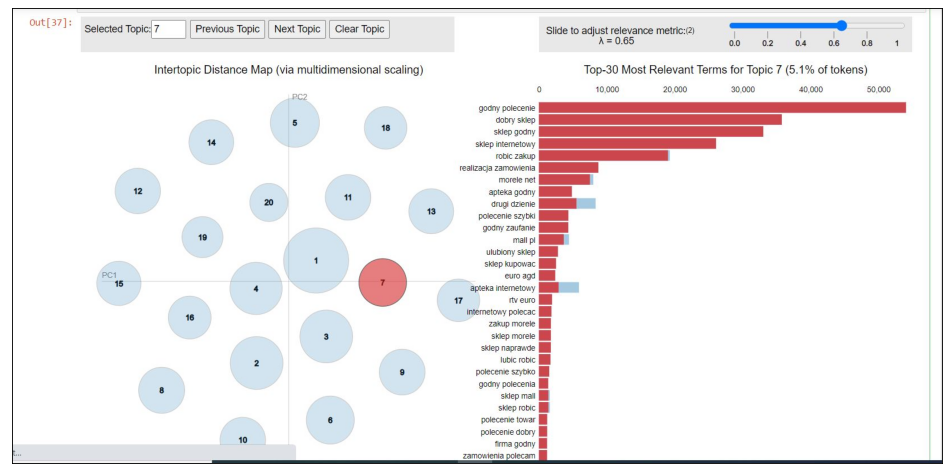

In [40]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
image = mpimg.imread("LDA1.jpg")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [42]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_params = {
    'min_df': 5,
    'max_df': 0.95,
    'ngram_range': (2, 2)
}

tfidf_vectorizer = TfidfVectorizer(**tfidf_params)
tfidf = tfidf_vectorizer.fit_transform(description_transformed)

In [ ]:
from sklearn.model_selection import GridSearchCV
lda_params = {
    'learning_method': 'batch',
    'max_iter': 100,
    'perp_tol': 0.1,
    'evaluate_every': 1
}

lda = LatentDirichletAllocation(**lda_params)

lda_changing_params = {
    'n_components': np.arange(5, 41, 1)
}
clf = GridSearchCV(lda, lda_changing_params, cv=5, refit=True, n_jobs=-1, verbose=3)
clf.fit(tfidf)
cv_results_df = pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
